In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy import special
import pandas as pd

In [55]:
def durbin_watson_test(vec_x,vec_y):

    nx = vec_x.shape[0]
    ny = vec_y.shape[0]
    
    if nx != ny:
        print(nx,ny)
        print('Warning: Vector X and Y have different size!')
        
    else:
        print('X & Y have same size :)')
        
        sum_xy = np.sum(vec_x*vec_y)
        sum_x = np.sum(vec_x)
        sum_y = np.sum(vec_y)
        sum_x_sq = np.sum(vec_x**2)
        sum_dx_sq = np.sum((vec_x-np.mean(vec_x))**2)
        b = (nx*sum_xy-sum_x*sum_y)/(nx*sum_x_sq-sum_x**2)
        a = np.mean(vec_y)-b*np.mean(vec_x)
        
        y_fit = a+b*vec_x
        sum_y_yfit_sq = np.sum((vec_y-y_fit)**2)
        
        s_e = np.sqrt(1/(nx-2)*sum_y_yfit_sq)
        
        
        sigma_a = s_e*np.sqrt(sum_x_sq/(nx*sum_dx_sq))
        sigma_b = s_e/np.sqrt(sum_dx_sq)
        
        SST = np.sum((vec_y-np.mean(vec_y))**2)
        SSR = np.sum((y_fit-np.mean(vec_y))**2)
        SSE = sum_y_yfit_sq
        R_sq = SSR/SST
        R_pearson = np.sqrt(R_sq)
        F_test = SSR/SSE
        t_a = a/sigma_a
        t_b = b/sigma_b
        
        
        residuals = vec_y-y_fit
        residuals_lag=np.zeros(nx-1,dtype=float)
        res_norm = SSE
        acor = np.correlate(residuals, residuals,'same')/SSE
        
        
        
        for k in range(1,nx):
            #print('k',k)
            residuals_lag[k-1] = residuals[k] - residuals[k-1] 
       
        durbin_watson = np.sum(residuals_lag**2)/SSE
    
        plt.scatter(vec_x,vec_y)
        plt.plot(vec_x,y_fit,color='r')
        print('=======================')
        print('y = a + bx')
        print('Slope b:',f"{b:.3}")
        print('Sigma b:',f"{sigma_b:.3}")
        print('Intercept a:',f"{a:.4}")
        print('Sigma Intercept a:',f"{sigma_a:.4}")
        
        print('=======================')
        print('lag-1 Autocorr:',f"{acor[1]:.3}")
        print('Durbin-Watson Test')
        print('d:',f"{durbin_watson:.3}")
        print('=======================')
        
        
        
        #return b,a
   



X & Y have same size :)
y = a + bx
Slope b: 0.597
Sigma b: 0.046
Intercept a: 12.46
Sigma Intercept a: 0.859
lag-1 Autocorr: 0.188
Durbin-Watson Test
d: 1.56


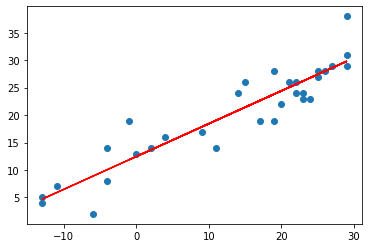

In [56]:
# Example 6.1 - A Simple Linear Regression

# Table A.1 Tmin at Itacta vs. Canadaiguga in °F
T_min_Ithc = np.array([19,25,22,-1,4,14,21,22,23,27,29,25,29,15,29,24,0,2,26,17,19,9,20,-6,
                      -13,-13,-11,-4,-4,11,23])

T_min_Cndg = np.array([28,28,26,19,16,24,26,24,24,29,29,27,31,26,38,23,13,14,28,19,19,17,
                      22,2,4,5,7,8,14,14,23])


#print(T_min_Cndg*T_min_Ithc)

durbin_watson_test(T_min_Ithc,T_min_Cndg)